In [21]:
import tensorflow as tf
import numpy as np
import sklearn
import os

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
# Pfad zum Ordner mit den Bildern
data_dir = 'files/dataset'

all_images = []
all_labels = []

# Durchlaufen Sie alle Ordner und Unterverzeichnisse in 'dataset'
for label_folder in os.listdir(data_dir):
    label_folder_path = os.path.join(data_dir, label_folder)
    
    # Stellen Sie sicher, dass es sich um ein Verzeichnis handelt
    if os.path.isdir(label_folder_path):
        for image_file in os.listdir(label_folder_path):
            image_file_path = os.path.join(label_folder_path, image_file)
            
            # Überprüfen, ob es sich tatsächlich um eine Datei handelt (und z.B. nicht um ein Unterverzeichnis)
            if os.path.isfile(image_file_path):
                all_images.append(image_file_path)
                all_labels.append(label_folder)

train_val_imgs, test_images, train_val_labels, test_labels = sklearn.model_selection.train_test_split(all_images, all_labels, test_size=0.3)
training_data_img, validation_data_img, training_data_labels, validation_data_labels = sklearn.model_selection.train_test_split(train_val_imgs, train_val_labels, test_size=0.2)

print(len(train_val_imgs), len(test_images))
print(len(training_data_img), len(validation_data_img))

7089 3039
5671 1418


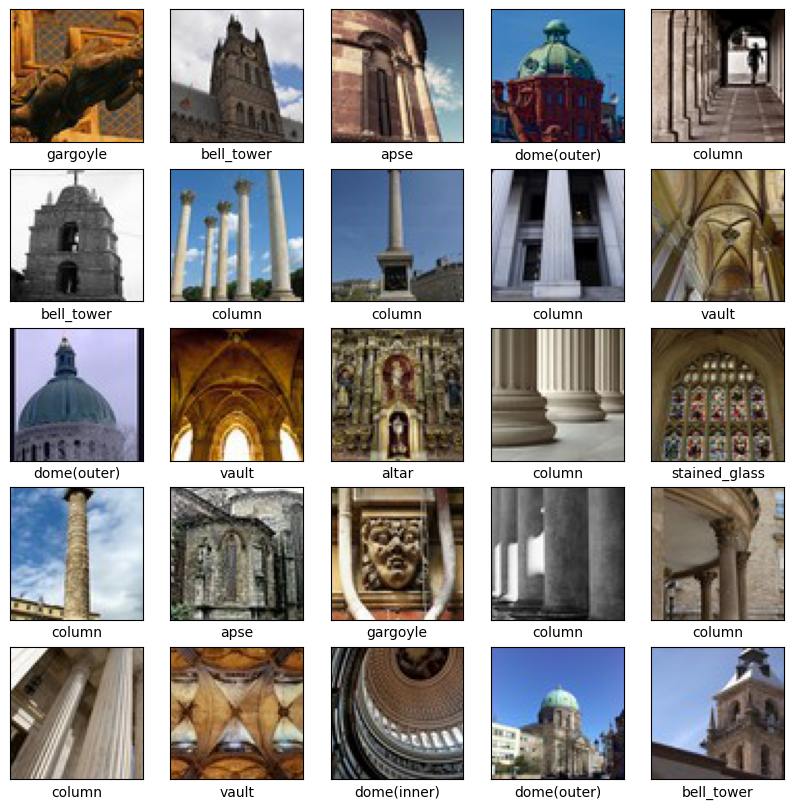

In [25]:
class_names = ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)',
               'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']

plt.figure(figsize=(10,10))

# Nur einen Batch von Bildern und Labels holen
images, labels = training_data_img, training_data_labels

for i in range(25):  # Angenommen, der Batch hat mindestens 25 Bilder
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(images[i]))

    # Anpassung für die Behandlung von String-Labels
    if isinstance(labels[i], str):
        # Konvertiert den Klassennamen direkt in den entsprechenden Index
        label_index = class_names.index(labels[i])
    elif isinstance(labels[i], np.ndarray):
        # Wenn die Labels One-Hot-Encoded sind
        label_index = np.argmax(labels[i])  # Konvertiert One-Hot-Encoded Labels in Index
    else:
        # Fallback für andere Fälle
        label_index = labels[i]

    plt.xlabel(class_names[label_index])
plt.show()